# EXPLORATORY DATA ANALYSIS (EDA)
### K-MEANS SCATTERING

### Load Dataset and Describe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("Datasets/Cleaned_Dataset.csv", dtype={"timestamp": str})
df['timestamp'] = pd.to_datetime(df['timestamp'])

sensor_cols = ["lidar_points", "radar_objects", "camera_objects"]
network_cols = ["packet_drop_rate", "packet_delivery_ratio", "latency_ms", "throughput_kbps"]
accuracy_cols = ["obstacle_detection_accuracy", "decision_accuracy"]
gps_cols = ["gps_latitude", "gps_longitude"]

numeric_cols = gps_cols + sensor_cols + network_cols + accuracy_cols
df_numeric = df[numeric_cols]

df_numeric.describe()

,gps_latitude,gps_longitude,lidar_points,radar_objects,camera_objects,packet_drop_rate,packet_delivery_ratio,latency_ms,throughput_kbps,obstacle_detection_accuracy,decision_accuracy
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,37.499000,-121.505809,19983.899130,27.277391,26.789130,0.150195,0.850363,156.076087,549.044348,0.846967,0.849623
std,0.289869,0.294706,5780.863289,12.779745,12.875871,0.085087,0.086613,82.755323,263.700168,0.086724,0.088263
min,37.000115,-121.999854,10002.000000,5.000000,5.000000,0.000000,0.700000,10.000000,100.000000,0.700000,0.700000
25%,37.243931,-121.754191,14929.000000,16.000000,16.000000,0.076000,0.776000,87.000000,318.000000,0.770000,0.770000
50%,37.499082,-121.512347,19942.000000,27.000000,26.500000,0.153000,0.852000,158.000000,546.500000,0.850000,0.850000
75%,37.751229,-121.244705,25039.250000,38.000000,38.000000,0.221000,0.928000,225.000000,782.000000,0.920000,0.930000
max,37.999677,-121.001123,29983.000000,49.000000,49.000000,0.300000,1.000000,299.000000,999.000000,1.000000,1.000000


### K-MEANS CLUSTERING

Clustering real VANET states:

Sensor-heavy

Network-heavy

Low accuracy periods

Normal driving

In [2]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df["cluster"] = kmeans.fit_predict(scaled_data)

PCA Plot

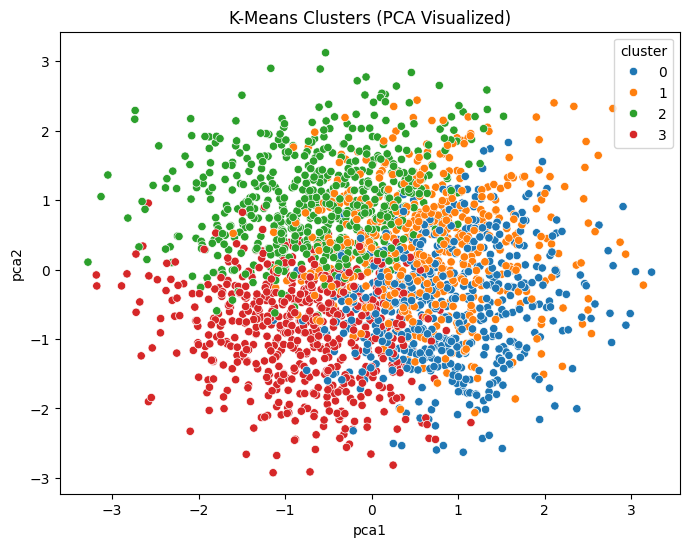

In [3]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df["pca1"] = pca_result[:,0]
df["pca2"] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="cluster", palette="tab10")
plt.title("K-Means Clusters (PCA Visualized)")
plt.show()

Cluster Insights

In [4]:
cluster_summary = df.groupby("cluster")[numeric_cols].mean()
display(cluster_summary)

,gps_latitude,gps_longitude,lidar_points,radar_objects,camera_objects,packet_drop_rate,packet_delivery_ratio,latency_ms,throughput_kbps,obstacle_detection_accuracy,decision_accuracy
cluster,,,,,,,,,,,
0,37.408612,-121.396867,20081.021898,26.262774,18.317518,0.134854,0.807456,178.784672,577.067518,0.819865,0.918394
1,37.566522,-121.583872,17693.541284,23.866055,23.629358,0.150192,0.819218,208.477064,587.240367,0.851134,0.773083
2,37.624059,-121.464696,22557.580750,32.508972,29.898858,0.222325,0.868083,127.303426,522.541599,0.863181,0.840979
3,37.391376,-121.577117,19339.715488,25.944444,34.294613,0.089915,0.900236,116.740741,515.496633,0.851414,0.865323


Cluster Size Distribution

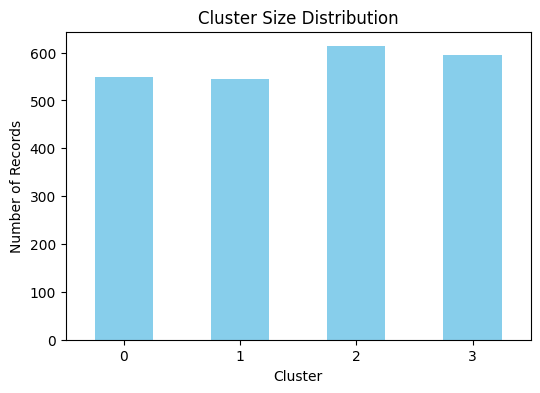

In [5]:
plt.figure(figsize=(6,4))
df["cluster"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Records")
plt.xticks(rotation=0)
plt.show()

Cluster Feature Radar Chart

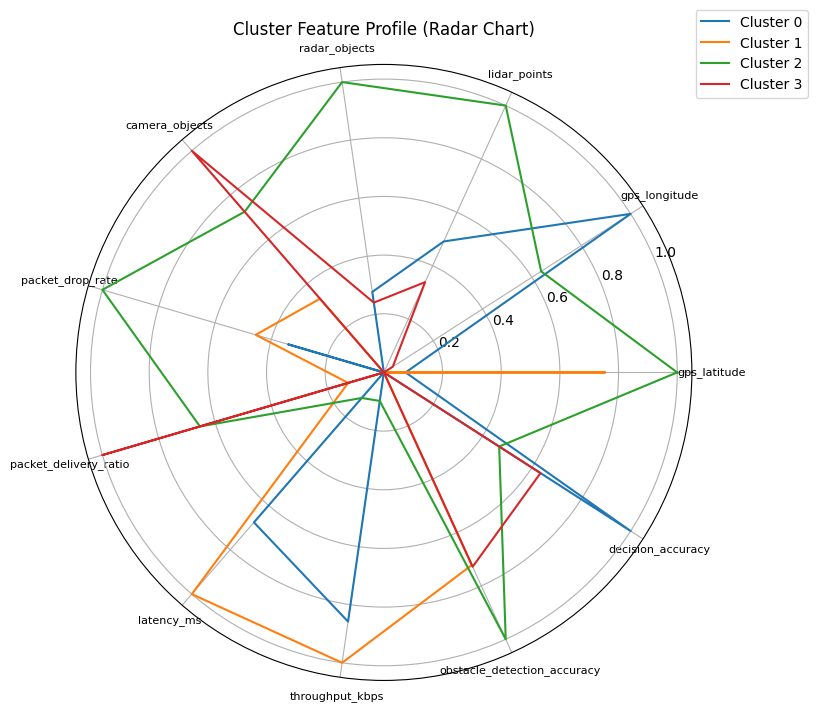

In [6]:
from math import pi

cluster_means = cluster_summary.copy()

# Normalize 0–1 for plotting
cluster_norm = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

features = cluster_norm.columns.tolist()

plt.figure(figsize=(8,8))

for i in cluster_norm.index:
    angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
    angles += angles[:1]
    
    values = cluster_norm.loc[i].tolist()
    values += values[:1]
    
    plt.polar(angles, values, label=f"Cluster {i}")

plt.xticks(angles[:-1], features, fontsize=8)
plt.title("Cluster Feature Profile (Radar Chart)", size=12)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()